
# K Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
import pandas as pd
import os # use commandline
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
bank_cluster = pd.read_csv(io.BytesIO(uploaded['bank_cluster.csv']))
bank_cluster.head(20)

Saving bank_cluster.csv to bank_cluster.csv


,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO
5,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO
6,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO
7,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO
8,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO
9,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO


In [ ]:
from sklearn.preprocessing import LabelEncoder
df = bank_cluster.copy()
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['region'] = encoder.fit_transform(df['region'])
df['married'] = encoder.fit_transform(df['married'])
df['children'] = encoder.fit_transform(df['children'])
df['car'] = encoder.fit_transform(df['car'])
df['save_act'] = encoder.fit_transform(df['save_act'])
df['current_act'] = encoder.fit_transform(df['current_act'])
df['mortgage'] = encoder.fit_transform(df['mortgage'])
df.head()

   age  sex  region   income  married  children  car  save_act  current_act  \
0   48    0       0  17546.0        0         1    0         0            0   
1   40    1       3  30085.1        1         3    1         0            1   
2   51    0       0  16575.4        1         0    1         1            1   
3   23    0       3  20375.4        1         3    0         0            1   
4   57    0       1  50576.3        1         0    0         1            0   

   mortgage  
0         0  
1         1  
2         0  
3         0  
4         0  


In [ ]:
bank_cluster = pd.read_csv("bank_cluster.csv")
print(bank_cluster.info())
print(bank_cluster.describe())
print(bank_cluster.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    object 
 2   region       600 non-null    object 
 3   income       600 non-null    float64
 4   married      600 non-null    object 
 5   children     600 non-null    int64  
 6   car          600 non-null    object 
 7   save_act     600 non-null    object 
 8   current_act  600 non-null    object 
 9   mortgage     600 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 47.0+ KB
None
              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.2500

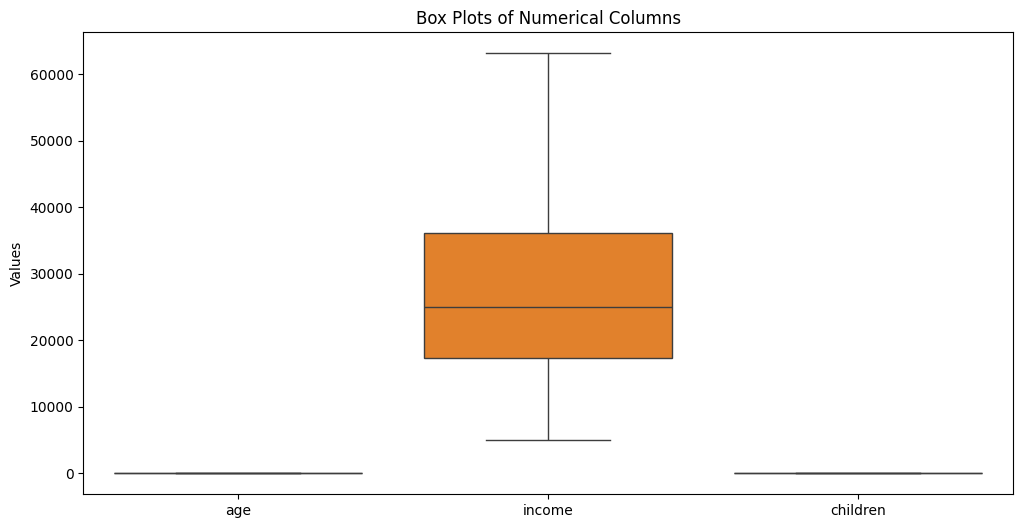

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age', 'income', 'children']

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(data=bank_cluster[num_cols], orient="v") # orient="v" for vertical box plots
plt.title('Box Plots of Numerical Columns')
plt.ylabel('Values')
plt.show()

# Clustering with K-means

**Use the following code to segment the customers into five clusters and highlight the clusters: **



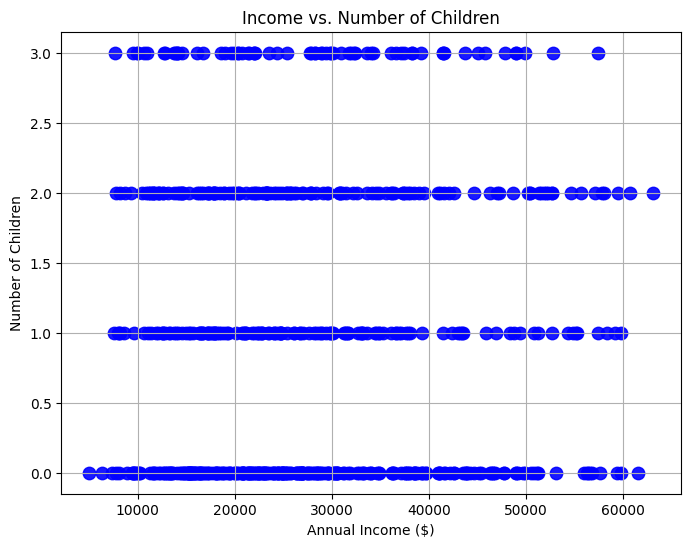

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

points = bank_cluster[['income', 'children']].values
x = points[:, 0]  # Income
y = points[:, 1]  # Children

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=80, alpha=0.9, color='b')  # s = ขนาดของจุด, alpha = ระดับความโปร่งใส
plt.xlabel('Annual Income ($)')
plt.ylabel('Number of Children')
plt.title('Income vs. Number of Children')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points) # สร้าง model



KMeans(n_clusters=4, random_state=0)

In [ ]:
centers = kmeans.cluster_centers_  #ดึงค่า centroid ของแต่ละ cluster มาเก็บไว้ที่ centers เป็น array 2 มิติ 5 แถว  2 คอลัมน์
print(centers)

[[2.51076729e+04 9.46859903e-01]
 [5.19730263e+04 1.13157895e+00]
 [3.71793032e+04 1.07258065e+00]
 [1.42846986e+04 9.94818653e-01]]


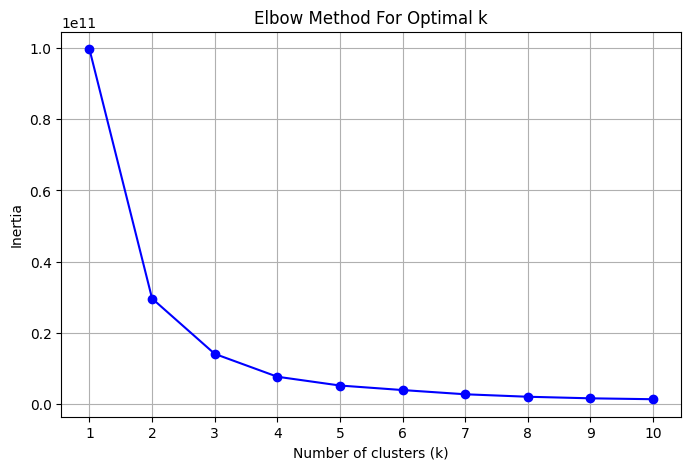

In [ ]:
points = df.iloc[:, 0:10].values

inertia = []  # เก็บค่า inertia สำหรับแต่ละจำนวนคลัสเตอร์
K = range(1, 11)  # ทดลองจำนวนคลัสเตอร์ตั้งแต่ 1 ถึง 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)  # ใช้ทุกคอลัมน์ใน df
    inertia.append(kmeans.inertia_)  # ค่า inertia สำหรับแต่ละ k

# สร้างกราฟ Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(points)
df['Cluster'] = kmeans.labels_
df

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,Cluster
0,48,0,0,17546.00,0,1,0,0,0,0,0
1,40,1,3,30085.10,1,3,1,0,1,1,2
2,51,0,0,16575.40,1,0,1,1,1,0,0
3,23,0,3,20375.40,1,3,0,0,1,0,0
4,57,0,1,50576.30,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,2,1,1,1,1,1
596,30,0,0,9672.25,1,0,1,1,1,0,0
597,31,0,3,15976.30,1,0,1,1,0,0,0
598,29,1,0,14711.80,1,0,0,1,0,1,0


In [ ]:
df.to_csv('new_bankcluster.csv',index=False)

In [ ]:
centers = kmeans.cluster_centers_  #5 clusters and 4 attributes
centers

array([[3.23699634e+01, 5.12820513e-01, 1.21611722e+00, 1.64878906e+04,
        6.81318681e-01, 9.96336996e-01, 4.32234432e-01, 6.08058608e-01,
        7.50915751e-01, 3.44322344e-01],
       [5.90566038e+01, 5.00000000e-01, 1.13207547e+00, 4.92589066e+04,
        6.79245283e-01, 1.07547170e+00, 5.09433962e-01, 1.00000000e+00,
        8.01886792e-01, 3.20754717e-01],
       [4.67873303e+01, 4.84162896e-01, 1.29864253e+00, 3.07320385e+04,
        6.24434389e-01, 1.00000000e+00, 5.61085973e-01, 6.42533937e-01,
        7.46606335e-01, 3.66515837e-01]])

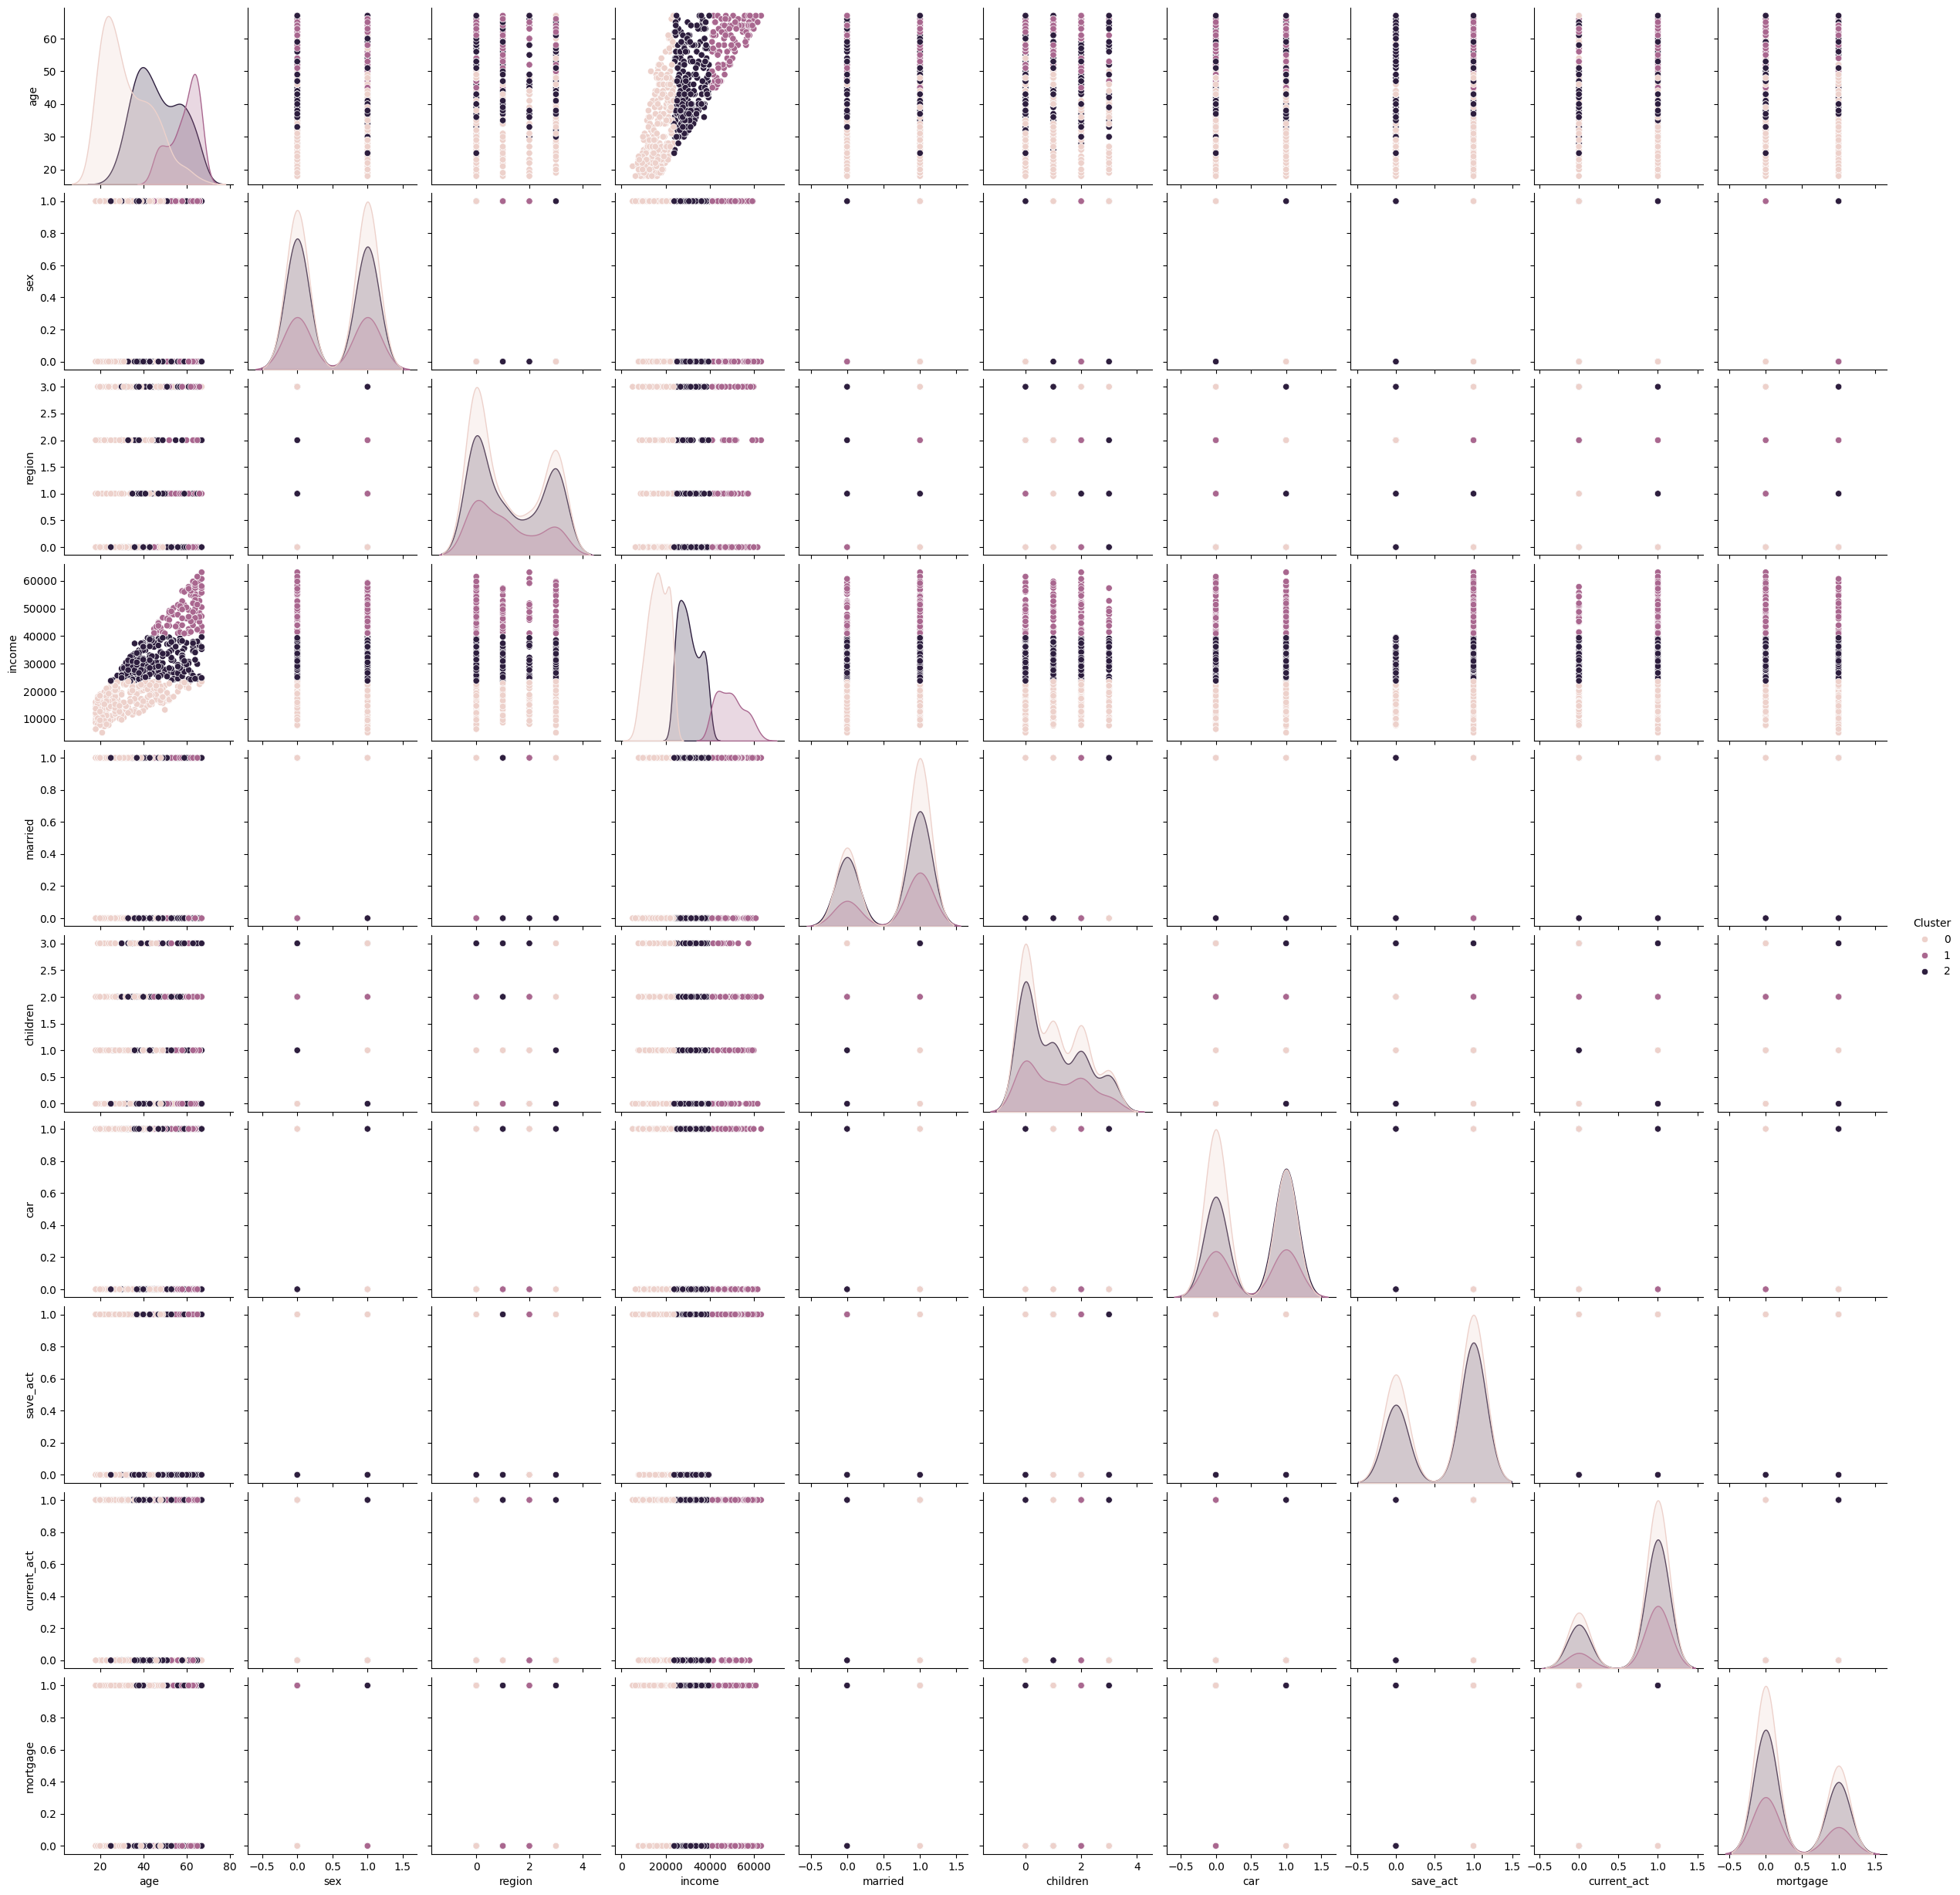

In [ ]:

 sns.pairplot(df,hue='Cluster')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
newdf = pd.DataFrame(pca_2d);
newdf['Cluster'] = kmeans.labels_
newdf

,0,1,Cluster
0,-9978.022999,13.999353,0
1,2561.065899,-4.539132,2
2,-10948.620118,17.814431,0
3,-7148.645040,-13.378030,0
4,23052.272894,-4.801082,1
...,...,...,...
595,19500.977532,2.180790,1
596,-17851.785344,2.629154,0
597,-11547.736742,-1.668133,0
598,-12812.237981,-2.617800,0


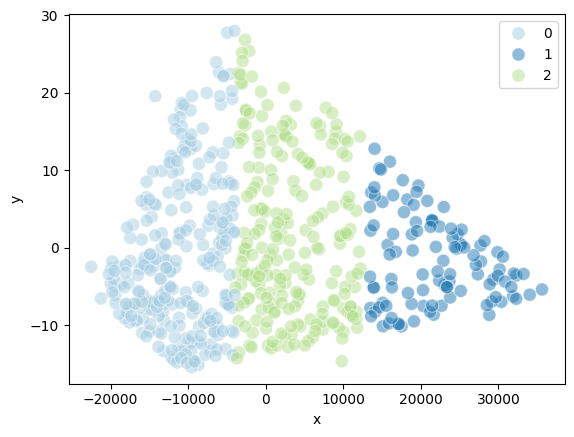

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=newdf[0], y=newdf[1], hue="Cluster", data=newdf, palette='Paired', s=90, alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

plt.show()

# ค่า centroid ของแต่ละ clusters

In [ ]:
centers

array([[3.23699634e+01, 5.12820513e-01, 1.21611722e+00, 1.64878906e+04,
        6.81318681e-01, 9.96336996e-01, 4.32234432e-01, 6.08058608e-01,
        7.50915751e-01, 3.44322344e-01],
       [5.90566038e+01, 5.00000000e-01, 1.13207547e+00, 4.92589066e+04,
        6.79245283e-01, 1.07547170e+00, 5.09433962e-01, 1.00000000e+00,
        8.01886792e-01, 3.20754717e-01],
       [4.67873303e+01, 4.84162896e-01, 1.29864253e+00, 3.07320385e+04,
        6.24434389e-01, 1.00000000e+00, 5.61085973e-01, 6.42533937e-01,
        7.46606335e-01, 3.66515837e-01]])

# Inertia sse
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

Inertia is not a normalized metric.

The lower values of inertia are better and zero is optimal.

But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

We can calculate model inertia as follows:-

In [ ]:
newcenters = pd.DataFrame(centers).round(0).astype('int')
newcenters

,0,1,2,3,4,5,6,7,8,9
0,32,1,1,16488,1,1,0,1,1,0
1,59,0,1,49259,1,1,1,1,1,0
2,47,0,1,30732,1,1,1,1,1,0


กลุ่มที่ 1 ลูกค้าในช่วงวัยทำงานช่วงต้น เพศชาย อาศัยอยู่ในพื้นที่ชนบท รายได้ไม่มาก แต่งงานมีลูกแล้ว 1 คน รถไม่มี มีบัญชีออมทรัพย์และบัญชีฝากประจำ ไม่มีสินเชื่อ

กลุ่มที่ 2 ลูกค้าในช่วงวัยใกล้เกษียณ รายได้สูง เพศหญิง อาศัยอยู่ในพื้นที่ชนบท แต่งงานมีลูกแล้ว 1 คน มีรถ มีบัญชีออมทรัพย์และบัญชีฝากประจำ ไม่มีสินเชื่อ

กลุ่มที่ 3 ลูกค้าในช่วงวัยที่ทำงานที่เริ่มมั่นคง รายได้ปานกลาง เพศหญิง อาศัยอยู่ในพื้นที่ชนบท แต่งงานมีลูกแล้ว 1 คน มีรถ มีบัญชีออมทรัพย์และบัญชีฝากประจำ ไม่มีสินเชื่อ


In [ ]:
kmeans.inertia_

14071731814.388144

In [ ]:
#unseen data
X=[[29,1,0,14711.80,1,0,0,1,0,1],
 [57,0,1,50576.30,1,0,0,1,0,0],
 [38,1,3,26671.60,0,0,1,0,1,1],
 [61,0,0,47025.00,0,2,1,1,1,1],
 [30,0,0,9672.25,1,0,1,1,1,0]]
C_clustered=kmeans.predict(X)
print(C_clustered)

[0 1 2 1 0]
